In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
""" if on Colab
from google.colab import drive
drive.mount('/content/drive')
"""

Mounted at /content/drive


In [2]:
# Download the scraped profiles here or https://www.kaggle.com/datasets/yashsrivastava51213/okcupid-profiles-dataset/code
"""
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yashsrivastava51213/okcupid-profiles-dataset")

print("Path to dataset files:", path)
"""

ModuleNotFoundError: No module named 'kagglehub'

In [31]:

df = pd.read_csv("./okcupid_profiles.csv")
print(f"{df.shape[0]} Applicants" , f"{df.shape[1]} Columns")
print(df.columns)


59946 Applicants 31 Columns
Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')


At first glance, essay0-essay9 has quite the ambuiguity, and the kaggle website does not specify the questions either, so we'll take a look at the first 20 entries...

*I could have looked through actual OkCupid website/profiles, but what fun would that be...*

In [29]:
print(f"{df.shape[0]} Applicants" , f"{df.shape[1]} Columns")


df.columns[21:]
essays_cols = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6','essay7', 'essay8', 'essay9']

for cols in essays_cols:
    print(f"{cols}: ")
    print(df[cols][0:20])
# Essay 0: 

59946 Applicants 31 Columns
essay0: 
0     about me:  i would love to think that i was so...
1     i am a chef: this is what that means. 1. i am ...
2     i'm not ashamed of much, but writing public te...
3             i work in a library and go to school. . .
4     hey how's it going? currently vague on the pro...
5     i'm an australian living in san francisco, but...
6     life is about the little things. i love to lau...
7                                                   NaN
8                                                   NaN
9     my names jake. i'm a creative guy and i look f...
10    update: i'm seeing someone, so off the market ...
11    i was born in wisconsin, grew up in iowa, and ...
12                                    bang my shit bang
13                                                  NaN
14                                                  NaN
15                                                  NaN
16    i just moved to the bay area from austin, tx (...
17    to su

From the first 20 responses, we can infer a lot about what essay questions were about:

- Essay 0: self_summary
- Essay 1: What I’m doing with my life
- Essay 2: I’m really good at
- Essay 3: The first thing people notice about me
- Essay 4: Favorite books, movies, shows, music, and food
- Essay 5: What can't you live without
- Essay 6: I spend a lot of time thinking about
- Essay 7: On a typical Friday night I am
- Essay 8: The most private thing I am willing to admit
- Essay 9: You should message me if...

There are 6 of majors


Text(0.5, 1.0, 'Distribution of Degree Majors')

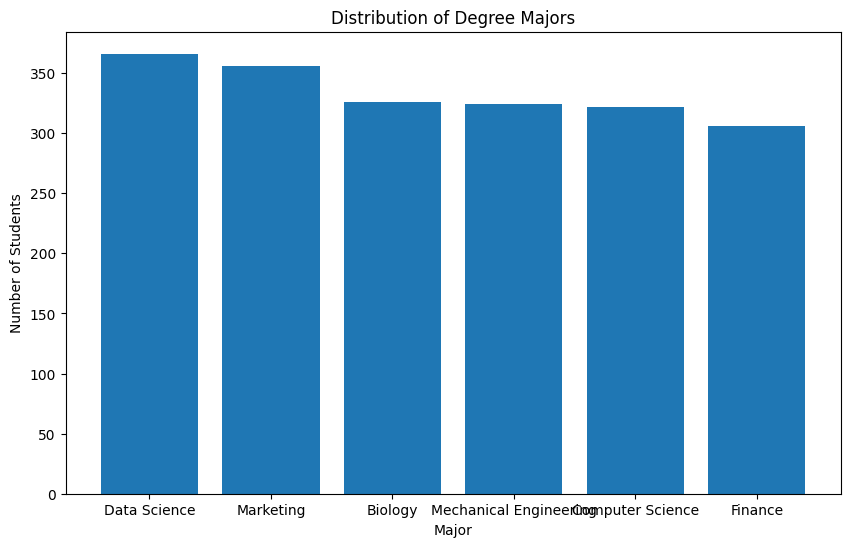

In [ ]:
"""
# See distribution of degree majors
amount_majors = df['Major'].nunique()
print(f"There are {amount_majors} of majors")

df_byMajors = df.groupby('Major')['Name'].count().reset_index(name='# of Students')
df_byMajors = df_byMajors.sort_values('# of Students', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(x=df_byMajors['Major'], height=df_byMajors['# of Students'], label=df_byMajors['Major'])
plt.xlabel('Major')
plt.ylabel('Number of Students')
plt.title('Distribution of Degree Majors')
"""

There are 5 of majors


Text(0.5, 1.0, 'Distribution of Degree Majors')

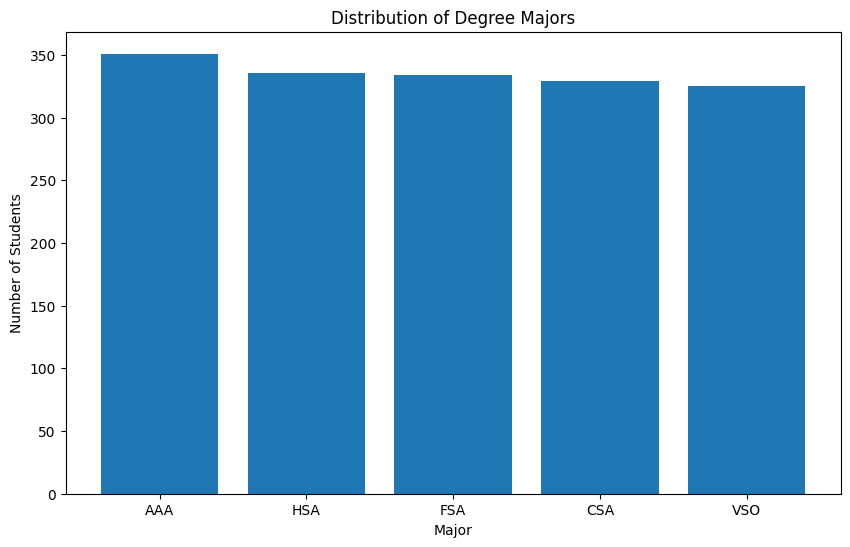

In [33]:
# See distribution of other extracurriculars
amount_majors = df['Other Orgs'].nunique()
print(f"There are {amount_majors} of majors")

df_byMajors = df.groupby('Other Orgs')['Name'].count().reset_index(name='# of Students')
df_byMajors = df_byMajors.sort_values('# of Students', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(x=df_byMajors['Other Orgs'], height=df_byMajors['# of Students'], label=df_byMajors['Other Orgs'])
plt.xlabel('Major')
plt.ylabel('Number of Students')
plt.title('Distribution of Degree Majors')

In [40]:
df_by_role = df['Role (0=Big,1=Little)'].value_counts().rename({0: 'Big', 1: 'Little'})
df_by_role

,count
"Role (0=Big,1=Little)",
Little,1000
Big,1000
